<a href="https://colab.research.google.com/github/mbl-cin/proj_KNN/blob/main/IF684_Tarefa_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title dataset
#link = https://archive.ics.uci.edu/dataset/45/heart+disease

In [ ]:
#@title Install the ucimlrepo package
!pip install ucimlrepo

In [ ]:
# Importando as bibliotecas necessárias
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#@title Mostra os dados do dataset "Heart Disease"
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

In [ ]:
# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)



{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [ ]:
# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features

y = rice_cammeo_and_osmancik.data.targets
y.loc[:, 'Class'] = y['Class'].apply(lambda x:  1 if x == 'Cammeo' else  0)

y = pd.Series(y['Class'])


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X)
print(y)


       Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     14688  507.166992         211.743378          89.312454      0.906691   
...     ...         ...                ...                ...           ...   
3805  11441  415.858002         170.486771          85.756592      0.864280   
3806  11625  421.390015         167.714798          89.462570      0.845850   
3807  12437  442.498993         183.572922          86.801979      0.881144   
3808   9882  392.296997         161.193985          78.210480      0.874406   
3809  11434  404.709992         161.079269          90.868195      0.825692   

      Convex_Area    Extent  
0           15617  0.

<ipython-input-61-1fe3e74b50f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, 'Class'] = y['Class'].apply(lambda x:  1 if x == 'Cammeo' else  0)
<ipython-input-61-1fe3e74b50f5>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  y.loc[:, 'Class'] = y['Class'].apply(lambda x:  1 if x == 'Cammeo' else  0)


In [ ]:
#normalizando dados
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

In [ ]:
# Treinando o modelo k-NN
knn = KNeighborsClassifier(n_neighbors=3)  # Definindo o número de vizinhos como 3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)

In [ ]:
# Calculando acurácia
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Accuracy: 0.9173228346456693
Precisão: 0.9175894956710727
Recall: 0.9173228346456693


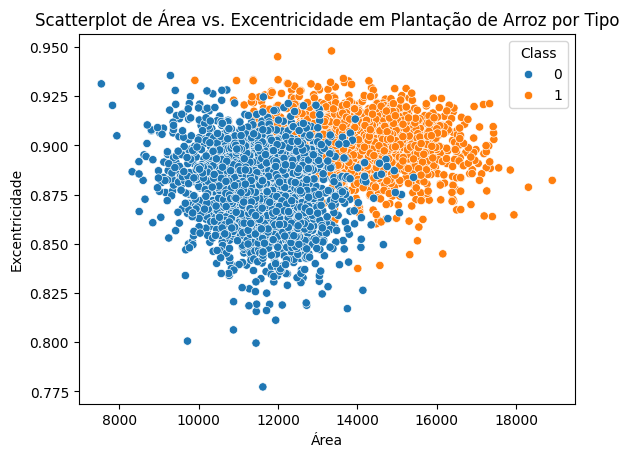

In [ ]:
heart_df = rice_cammeo_and_osmancik.data.features
heart_df['Class'] = rice_cammeo_and_osmancik.data.targets  # Adicionando a coluna de target 'num'

# Renomeando as colunas
heart_df.columns = rice_cammeo_and_osmancik.variables['name']

# Visualizando o scatterplot
sns.scatterplot(x=heart_df['Area'], y=heart_df['Eccentricity'], hue=heart_df['Class'])
plt.xlabel('Área')
plt.ylabel('Excentricidade')
plt.title('Scatterplot de Área vs. Excentricidade em Plantação de Arroz por Tipo')
plt.show()

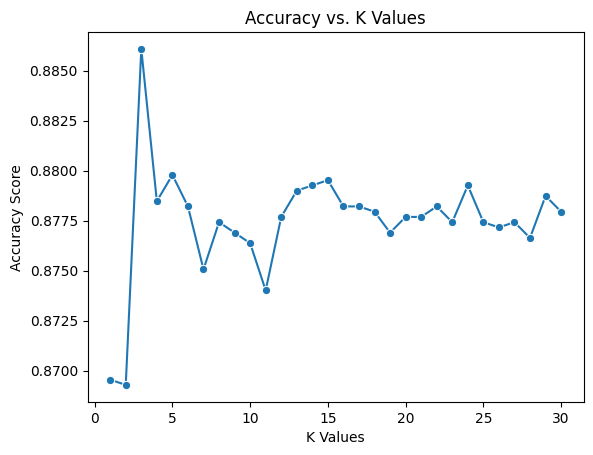

In [ ]:
# Listas para armazenar as pontuações de precisão
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

# Plotar o gráfico de precisão em relação aos valores de k
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("Accuracy vs. K Values")
plt.show()
